#### Pavlo Yatluk
#### dz_39

### ЗАВДАННЯ

#### Побудуйте класифікатор на основі дерева ухвалення рішень, використовуючи датасет ірісів Фішера - тренувальний набір ознак по трьох видах ірісів.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [54]:
# Завантажуємо датасет

from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [71]:
# розбиваємо датасет

X = pd.DataFrame(iris['data'], columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
print(X)                 
y = pd.DataFrame(iris['target'], columns=["target"])
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


In [78]:
# проводимо налаштування моделі

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5, min_samples_leaf=5)

In [79]:
# проводимо навчання моделі

clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [82]:
# проводимо прогонозування моделі

y_predict = clf_model.predict(X_test)

In [83]:
# оцінюємо зроблений прогноз

metrics.accuracy_score(y_test, y_predict)

1.0

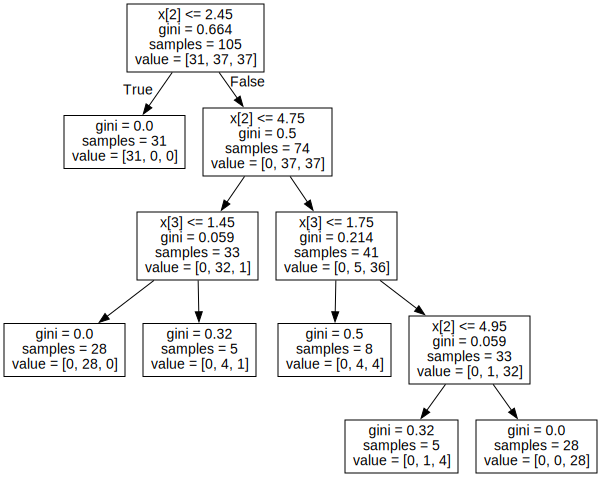

In [84]:
# візуалізуємо дерево ухвалення рішень

#target = list(iris['target'])
#feature_names = list(X.columns)
dot_data = tree.export_graphviz(clf_model)
grapth = graphviz.Source(dot_data)
grapth

In [85]:
# оцінюємо значимість параметрів

importance = clf_model.feature_importances_
importance

array([0.        , 0.        , 0.94917029, 0.05082971])

In [86]:
# візуалізуємо отримані оцінки параметрів

sorted_importance = pd.DataFrame({'feature': list(X_train.columns), 'importance': clf_model.feature_importances_}).sort_values('importance', ascending=False)
sorted_importance

,feature,importance
2,petal length,0.94917
3,petal width,0.05083
0,sepal length,0.00000
1,sepal width,0.00000
